# Klasifikatoriai - Atsakymas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


![](https://www.indushealthplus.com/media/article_img/heart-attack-facts-awareness-thumb.jpg)

# Užduotis

Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):
* importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)
* išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.
* patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.
* paruoškite duomenis modelio apmokymui
* apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite *confusion* matricas.
* pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.
* apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite *confusion* matricą.
* kuris modelis efektyviausias? Palyginkite *confusion* matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

Stulpelių paaiškinimai anglų kalba:

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

*dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti :)*

<Axes: xlabel='target', ylabel='count'>

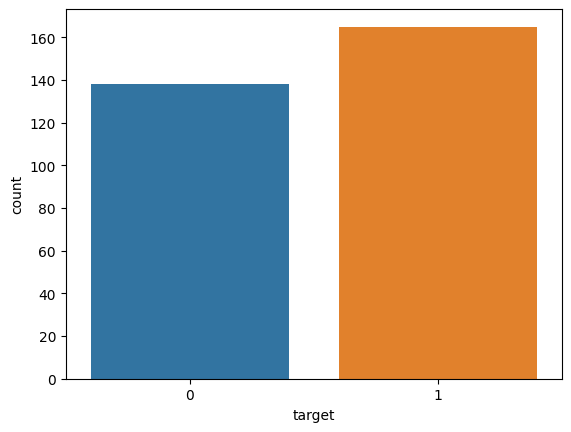

In [6]:
sns.countplot(x=heart['target'])

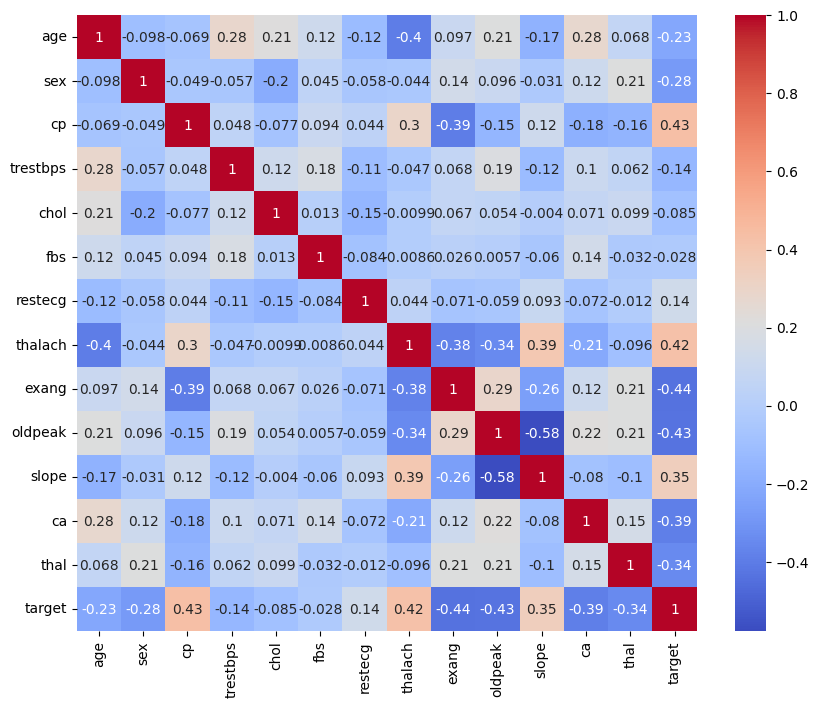

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
mtx = sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')

Įdomu tai, kad su target reikšme labiausiai koreliuoja fizinio krūvio metu nustatomi rodikliai. O kraujo spaudimas ir cholesterolis koreliuoja labai menkai. Palyginti, nemažai įtakos turi amžius ir lytis.

In [8]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='trestbps', ylabel='chol'>

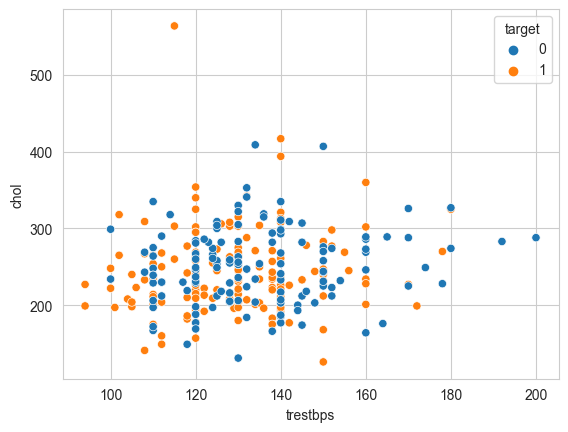

In [10]:
sns.set_style('whitegrid')
sns.scatterplot(x='trestbps', y='chol', data=heart, hue='target')

Deja, sunkiai pavyksta atspausdinti kažką, kas rodytų didesnius kontrastus. Pamėginkime .pairplot() su išmestomis kategorinėmis reikšmėmis:

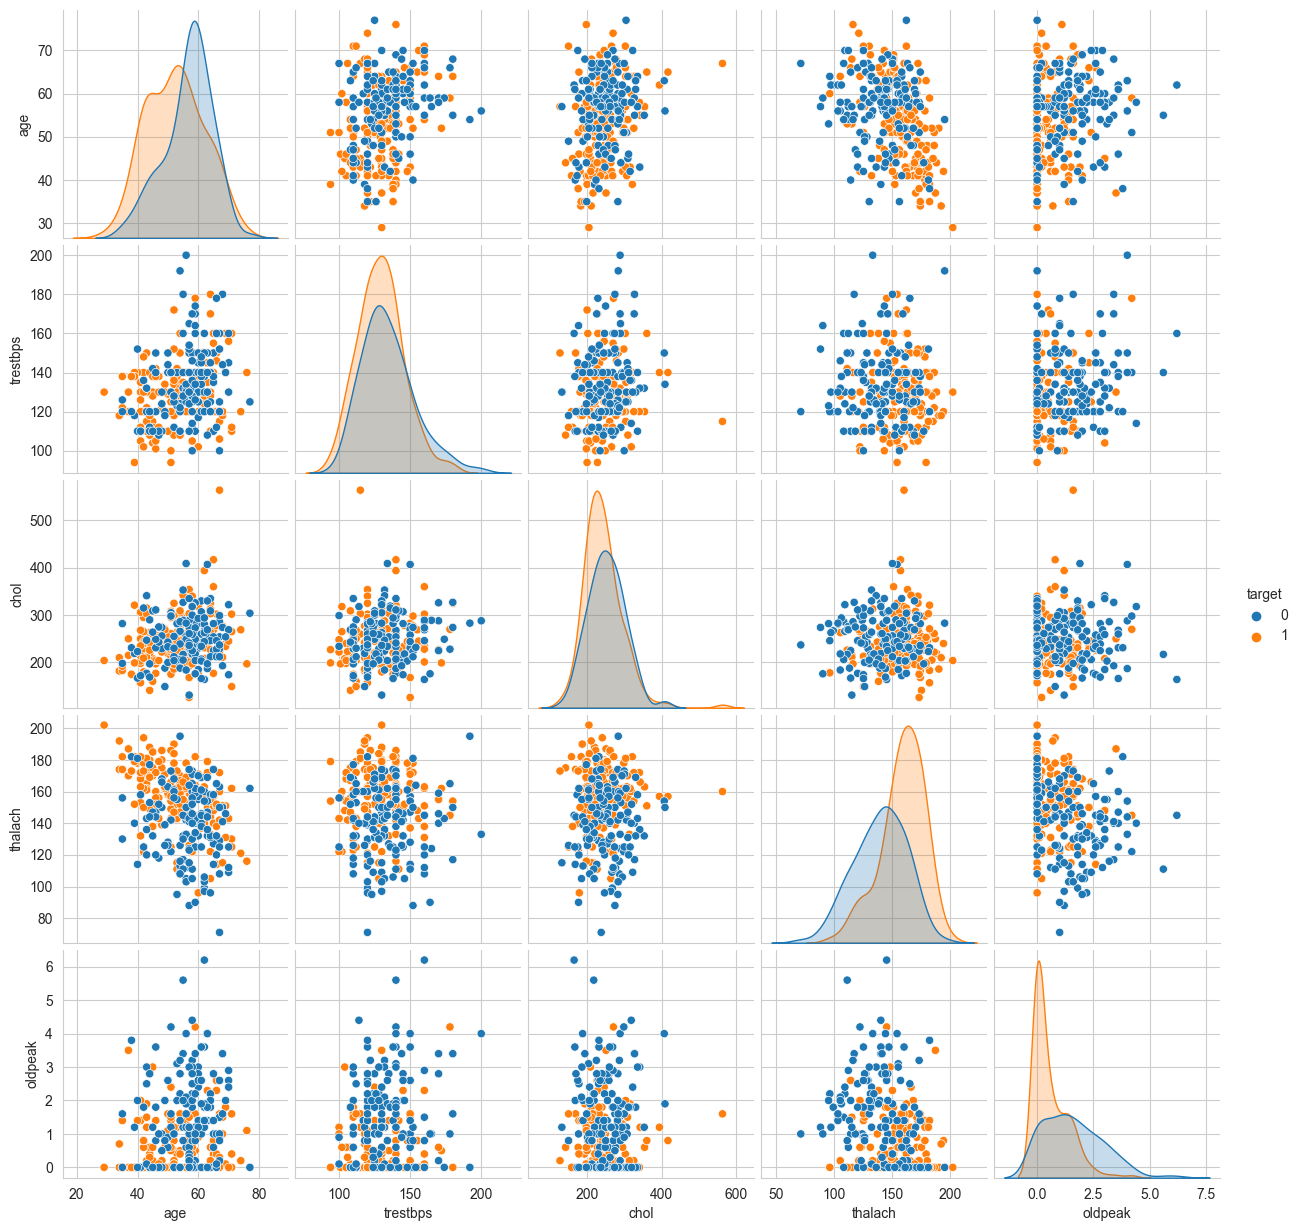

In [11]:
sns.pairplot(heart.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']), hue='target')

Panašu, kad target reikšmės tam tikrose porose grupuojasi, galime tikėtis neblogų modelių efektyvumų.

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


išrinksime kategorines reikšmes, kurios turi daugiau negu 2 reikšmes, sukursime *dummies*

In [16]:
heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [17]:
heart['slope'].unique()

array([0, 2, 1], dtype=int64)

In [18]:
heart['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [19]:
heart['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [20]:
dummies_cp = pd.get_dummies(heart['cp'])
dummies_cp.columns = ['cp0', 'cp1', 'cp2', 'cp3']
dummies_slope = pd.get_dummies(heart['slope'])
dummies_slope.columns = ['slope0', 'slope1', 'slope2']
dummies_ca = pd.get_dummies(heart['ca'])
dummies_ca.columns = ['ca0', 'ca1', 'ca2', 'ca3', 'ca4']
dummies_thal = pd.get_dummies(heart['thal'])
dummies_thal.columns = ['thal0', 'thal1', 'thal2', 'thal3']

In [21]:
dummies = pd.concat([dummies_ca, dummies_cp, dummies_slope, dummies_thal], axis=1)
dummies.head()

,ca0,ca1,ca2,ca3,ca4,cp0,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


dummies sukurti, dabar jungsime su pagrindine lentele

In [22]:
heart.drop(columns = ['ca', 'cp', 'slope', 'thal'], inplace=True)
df = pd.concat([heart, dummies], axis=1)

In [23]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,1,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,1,...,False,False,False,False,False,True,False,False,True,False


atskirsime target stulpelį:

In [24]:
X = df.drop('target', axis=1)

In [25]:
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,True,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,True,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,True,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,True,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,True,...,False,False,False,False,False,True,False,False,True,False


In [26]:
y = df['target']

In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

viskas, toliau galime copy-paste daryti iš paskaitos:)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=42)

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=249).fit(X_train, y_train)

In [58]:
model.score(X_train, y_train)

0.8729281767955801

In [59]:
lr_preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_preds)
lr_cm

array([[44,  8],
       [ 6, 64]], dtype=int64)

<Axes: >

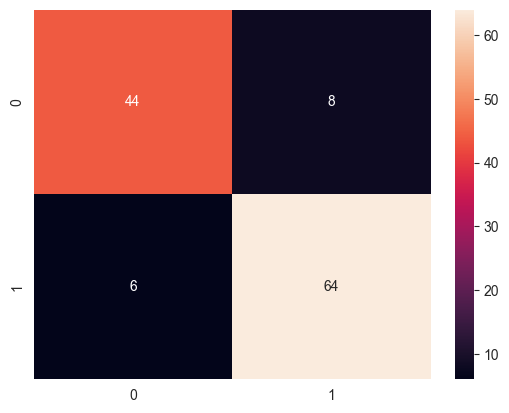

In [60]:
sns.heatmap(lr_cm, annot=True)

Pažaiskime su parametrais. Perspėjimo žinutėje nurodyta, kad solver parametras automatiškai nustatomas 'lbfgs'. Paskaitę dokumentaciją galime išsiaiškinti, kokie yra galimi variantai. 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'. Pasibandykime su visais.

In [61]:
from sklearn.linear_model import LogisticRegression
model_newton_cg = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [62]:
lr_newton_preds = model_newton_cg.predict(X_test)
from sklearn.metrics import confusion_matrix
lr_newton_cm = confusion_matrix(y_test, lr_newton_preds)
lr_newton_cm

array([[44,  8],
       [ 5, 65]], dtype=int64)

<Axes: >

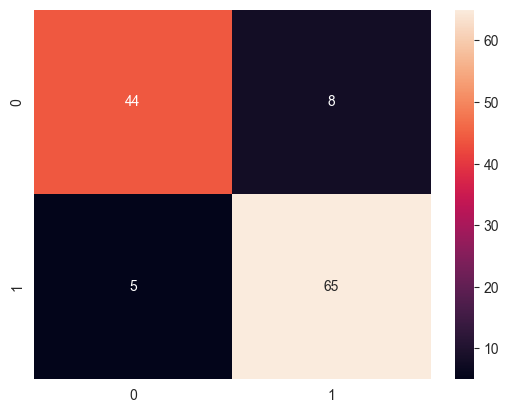

In [63]:
sns.heatmap(lr_newton_cm, annot=True)

Viena diagnoze tiksliau! Galbūt išgelbėjome gyvybę :)

# Decision Trees

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7868852459016393

In [65]:
dtc_preds = dtc.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_preds)
dtc_cm

array([[42, 10],
       [16, 54]], dtype=int64)

<Axes: >

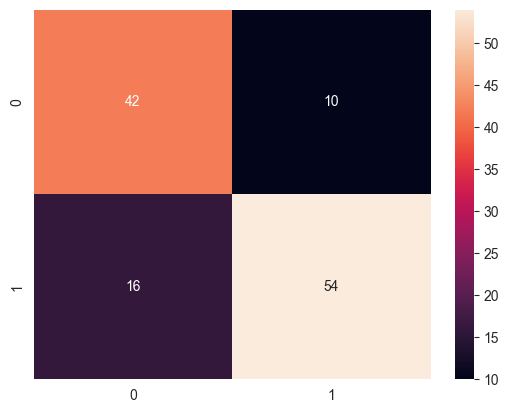

In [66]:
sns.heatmap(dtc_cm, annot=True)

# Random Forests:

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5000).fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8360655737704918

bežaidžiant su miškų kiekiu, aiškėja, kad kompiuteris susitvarko nesunkiai, tad paieškokim optimalios vertės:

In [68]:
def optimal_estimators(state, est):
    list_of_dicts = []
    for s in range(state):
        index_value_pairs = {}
        for i in range(est):
            rfc = RandomForestClassifier(n_estimators = i+1, random_state= s+1).fit(X_train, y_train)
            index_value_pairs.update({f'estimators{i+1}':rfc.score(X_test, y_test)})
        list_of_dicts.append(index_value_pairs)
    return list_of_dicts

        

Parašėme funkciją, kuri praleidžia per ciklus nurodytą skaičių state, ir estimators parametrų. *State* reikalingas tam, kad fiksuotų *random forest* atsitiktinių reikšmių generatoriaus statusą. Tokiu būdu, apmokius modelį iš naujo, turėsime tas pačias reikšmes.

In [69]:
opt = optimal_estimators(100, 100) # ilgai užtruks, gali iki ~10min.


Sudėkime gautą sąrašą iš žodynų į DataFrame.

In [70]:
best_values = pd.DataFrame(opt).T
best_values.columns = columns = list(range(1, len(opt)+1))
best_values.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
estimators1,0.754098,0.778689,0.754098,0.803279,0.737705,0.770492,0.729508,0.729508,0.696721,0.786885,...,0.737705,0.729508,0.704918,0.786885,0.737705,0.786885,0.786885,0.721311,0.762295,0.729508
estimators2,0.688525,0.696721,0.729508,0.786885,0.704918,0.762295,0.647541,0.696721,0.696721,0.704918,...,0.663934,0.663934,0.713115,0.745902,0.696721,0.737705,0.721311,0.737705,0.696721,0.721311
estimators3,0.770492,0.827869,0.795082,0.811475,0.803279,0.827869,0.770492,0.729508,0.778689,0.811475,...,0.737705,0.762295,0.770492,0.795082,0.729508,0.770492,0.795082,0.803279,0.803279,0.811475
estimators4,0.770492,0.754098,0.770492,0.778689,0.770492,0.745902,0.745902,0.745902,0.762295,0.754098,...,0.729508,0.737705,0.770492,0.745902,0.754098,0.770492,0.754098,0.786885,0.754098,0.786885
estimators5,0.778689,0.819672,0.811475,0.844262,0.811475,0.795082,0.762295,0.786885,0.827869,0.836066,...,0.803279,0.803279,0.786885,0.836066,0.770492,0.786885,0.754098,0.844262,0.778689,0.819672


Turime lentelę su 10000 reikšmių.

In [71]:
best_values.max().idxmax() # sužinome stulpelio nr. Tai mūsų *random_state* parametras.

35

In [72]:
best_values.idxmax()[35] #sužinome savo estimators parametrą

'estimators7'

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc_optimized = RandomForestClassifier(n_estimators = 11, random_state=35).fit(X_train, y_train)
rfc_optimized.score(X_test, y_test)

0.8852459016393442

In [74]:
rfc_preds = rfc_optimized.predict(X_test)
rfc_cm = confusion_matrix(y_test, rfc_preds)
rfc_cm

array([[46,  6],
       [ 8, 62]], dtype=int64)

<Axes: >

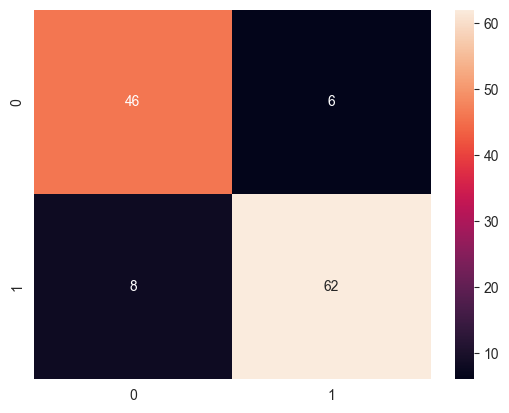

In [75]:
sns.heatmap(rfc_cm, annot=True)

In [76]:
y_test.value_counts()

target
1    70
0    52
Name: count, dtype: int64

# KNearest Neighbors

pradėsime nuo duomenų paruošimo KNN klasifikatoriui. Turime per scaler'į praleisti viską, išskyrus 'target stulpelį'. Tuomet pakeistas reikšmes ir target stulpelį paduoti į train_test_split. Target stulpelį turime jau gatavą. O modifikuosime tą dalį, kuri dabar *X* kintamąjame.

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) # sukuriame StandardScaler objektą
scaled_features = scaler.transform(X) # perdarome reikšmes į KNN klasifikatoriui priimtinesnį formatą
scaled_features[:4]

array([[ 0.9521966 ,  0.68100522,  0.76395577, -0.25633371,  2.394438  ,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422, -0.63464776,  3.4891135 ,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391,  3.97911213, -1.10076284, -0.79311554],
       [-1.91531289,  0.68100522, -0.09273778,  0.07219949, -0.41763453,
         0.89896224,  1.63347147, -0.69663055,  2.12257273,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422,  1.57567719, -0.28660575,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391, -0.25131234,  0.9084609 , -0.79311554],
       [-1.47415758, -1.46841752, -0.09273778, -0.81677269, -0.41763453,
        -1.00583187,  0.97751389, -0.69663055,  0.31091206,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
         2.24944438, -0.63464776, -0.28660575, -0

In [78]:
features = pd.DataFrame(scaled_features, columns=X.columns)

In [79]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   trestbps  303 non-null    float64
 3   chol      303 non-null    float64
 4   fbs       303 non-null    float64
 5   restecg   303 non-null    float64
 6   thalach   303 non-null    float64
 7   exang     303 non-null    float64
 8   oldpeak   303 non-null    float64
 9   ca0       303 non-null    float64
 10  ca1       303 non-null    float64
 11  ca2       303 non-null    float64
 12  ca3       303 non-null    float64
 13  ca4       303 non-null    float64
 14  cp0       303 non-null    float64
 15  cp1       303 non-null    float64
 16  cp2       303 non-null    float64
 17  cp3       303 non-null    float64
 18  slope0    303 non-null    float64
 19  slope1    303 non-null    float64
 20  slope2    303 non-null    float6

In [80]:
from sklearn.neighbors import KNeighborsClassifier
XX_train, XX_test, yy_train, yy_test = \
train_test_split(features, y, test_size=0.4, random_state=42)
heart_knc = KNeighborsClassifier(n_neighbors = 103).fit(XX_train, yy_train)
heart_knc.score(XX_test, yy_test)

0.8934426229508197

In [81]:
knc_preds = heart_knc.predict(XX_test)
knc_cm = confusion_matrix(yy_test, knc_preds)
knc_cm

array([[42, 10],
       [ 3, 67]], dtype=int64)

<Axes: >

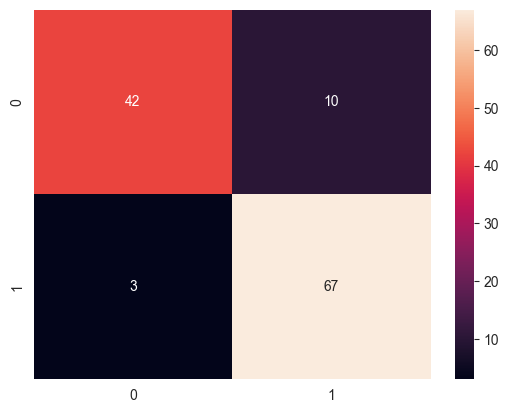

In [82]:
sns.heatmap(knc_cm, annot=True)

### kaip ieškojau optimalių neghbors reikšmių...

In [83]:
def find_optimal(neighbors):
    score_dict = {}
    for i in range(neighbors):
        knc_optimized = KNeighborsClassifier(n_neighbors = i+1).fit(XX_train, yy_train)
        score_dict.update({i+1:knc_optimized.score(XX_test, yy_test)})
    return score_dict

In [84]:
neighbors_dict = find_optimal(132)
max_sample = max(neighbors_dict, key=neighbors_dict.get)
max_sample

101

In [85]:
neighbors_dict[101]

0.8934426229508197

In [86]:
indexes = []
for k, v in neighbors_dict.items():
    if v == 0.8934426229508197:
        indexes.append(k)
indexes

[101, 103]